<a href="https://colab.research.google.com/github/Raisa-Rahman-Rodela/CSE438-Project/blob/main/draft_CSE438_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
import string
from wordcloud import WordCloud
from collections import Counter



from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#from scikitplot.metrics import plot_confusion_matrix, plot_roc

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Embedding
from tensorflow import keras


from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/38/dataset1.csv',  encoding = 'ISO-8859-1')

In [ ]:
#df1.head()

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/38/depression_dataset_reddit_cleaned.csv')

In [ ]:
print("dataset 1:")
display(df1.head())
print("dataset 2:")
display(df2.head())





dataset 1:


,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


dataset 2:


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
df1=df1.rename(columns={'text':'clean_text','label':'is_depression'})
df1.head()



,clean_text,is_depression
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [ ]:
display(df1.shape,df2.shape)

(6982, 2)

(7731, 2)

In [ ]:
merged_dataset = pd.concat([df1,df2])
merged_dataset.shape

(14713, 2)

In [ ]:
merged_dataset.head()

,clean_text,is_depression
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


# Data Pre-processing

In [ ]:
merged_dataset.isnull().sum()

clean_text       0
is_depression    2
dtype: int64

In [ ]:
merged_dataset=merged_dataset.dropna(how='any')

In [ ]:
merged_dataset.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [ ]:

merged_dataset['Total Words'] = merged_dataset['clean_text'].apply(lambda x: len(x.split()))

def count_total_words(clean_text):
    char = 0
    for word in clean_text.split():
        char += len(word)
    return char

merged_dataset['Total Chars'] = merged_dataset["clean_text"].apply(count_total_words)

In [ ]:
merged_dataset.head()

,clean_text,is_depression,Total Words,Total Chars
0,oh my gosh,1.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


In [ ]:
merged_dataset['is_depression'].value_counts()

0.0    10147
1.0     4564
Name: is_depression, dtype: int64

In [ ]:
def convert_lowercase(clean_text):
    clean_text = clean_text.lower()
    return clean_text

merged_dataset['clean_text'] = merged_dataset['clean_text'].apply(convert_lowercase)

In [ ]:
def remove_url(clean_text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', clean_text)

merged_dataset['clean_text'] =merged_dataset['clean_text'].apply(remove_url)

In [ ]:
exclude = string.punctuation

def remove_punc(clean_text):
    return clean_text.translate(str.maketrans('', '', exclude))

merged_dataset['clean_text'] = merged_dataset['clean_text'].apply(remove_punc)

In [ ]:

def remove_stopwords(clean_text):
    new_list = []
    words = word_tokenize(clean_text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

merged_dataset['clean_text'] = merged_dataset['clean_text'].apply(remove_stopwords)

In [ ]:
def perform_stemming(clean_text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(clean_text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

merged_dataset['clean_text'] = merged_dataset['clean_text'].apply(perform_stemming)

In [ ]:
merged_dataset['Total Words After Transformation'] = merged_dataset['clean_text'].apply(lambda x: np.log(len(x.split())))

In [ ]:
merged_dataset.head()

,clean_text,is_depression,Total Words,Total Chars,Total Words After Transformation
0,oh gosh,1.0,3,8,0.693147
1,troubl sleep confus mind restless heart tune,1.0,10,55,1.945910
2,wrong back dear forward doubt stay restless re...,1.0,14,65,2.197225
3,ive shift focu someth els im still worri,1.0,11,51,2.079442
4,im restless restless month boy mean,1.0,14,59,1.791759


In [ ]:
merged_dataset.shape

(14711, 5)

# Visualization

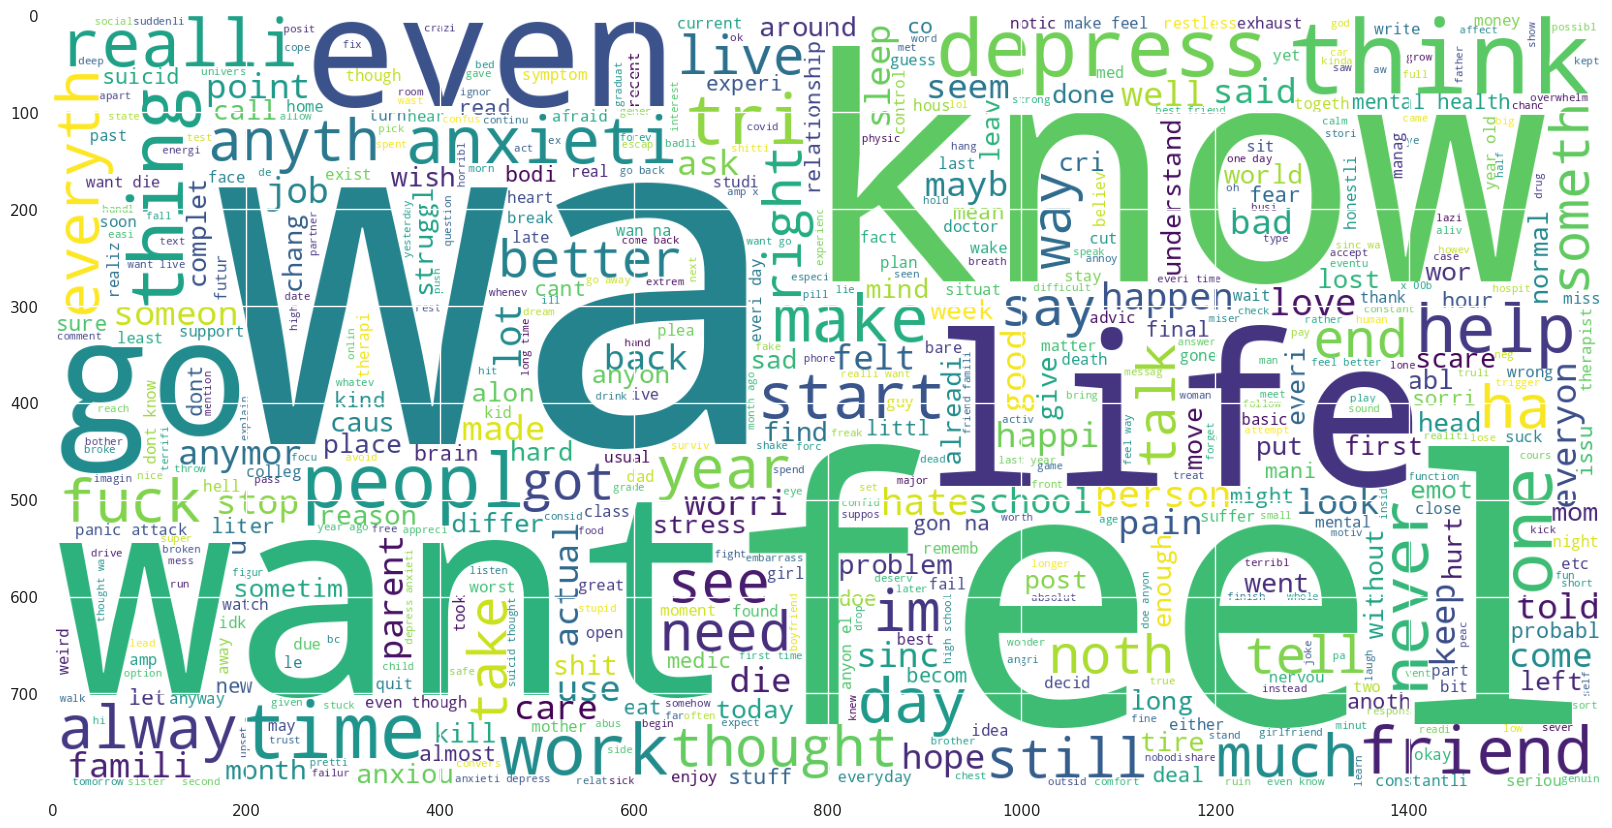

In [ ]:
#Non_Depressive_words

plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, 
               background_color="white").generate(" ".join(merged_dataset[merged_dataset["is_depression"]==1].clean_text))
plt.imshow(wc)


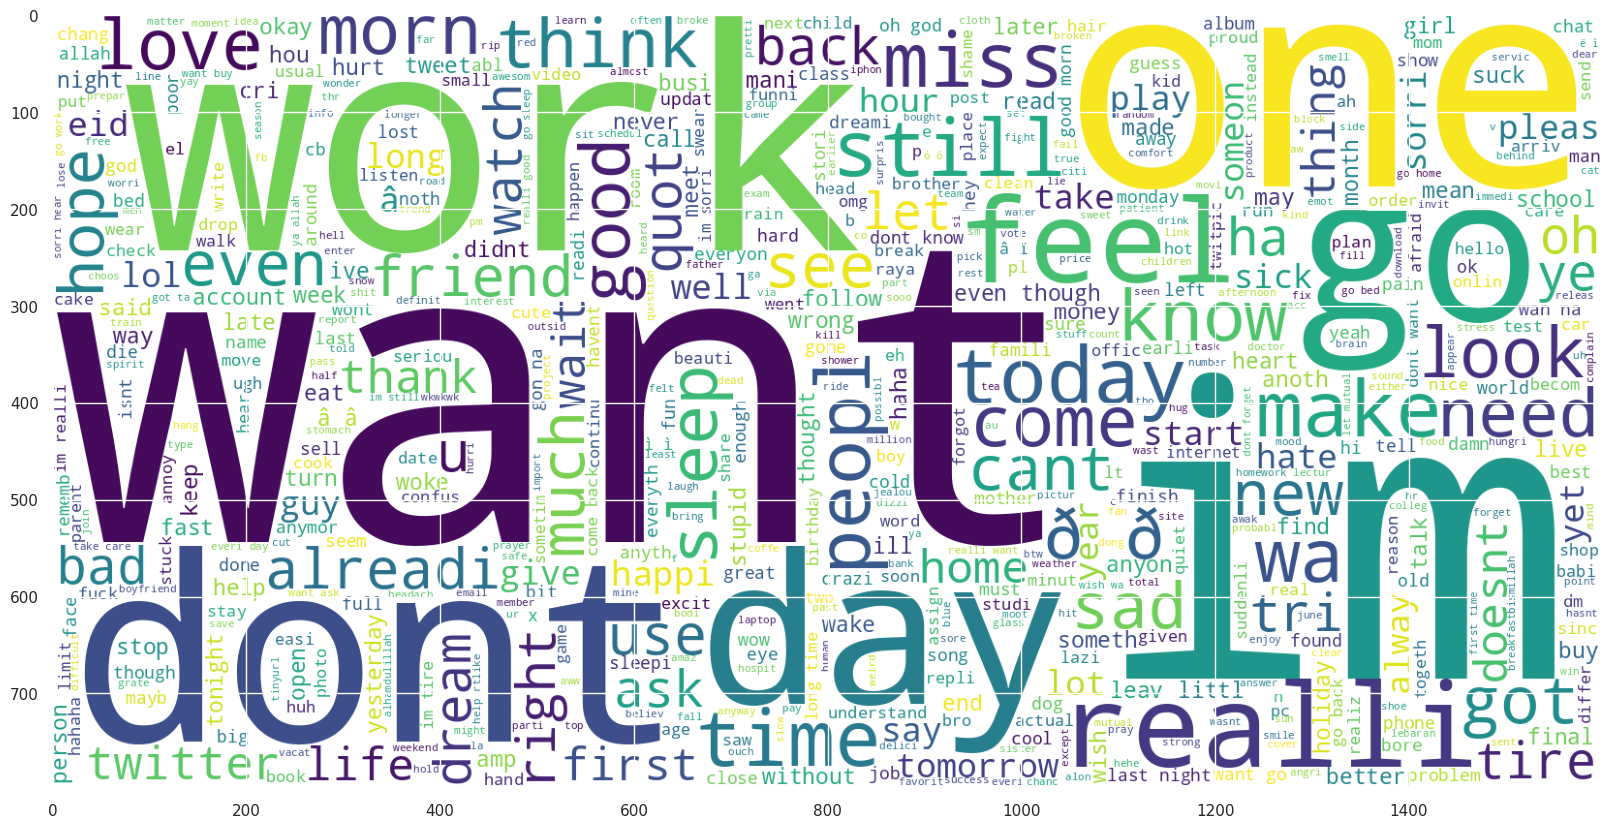

In [ ]:
#Depressive_words

plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, 
               background_color="white").generate(" ".join(merged_dataset[merged_dataset["is_depression"]==0].clean_text))
plt.imshow(wc1)

# Models


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(np.array(merged_dataset["clean_text"]),np.array(merged_dataset.is_depression), test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
 

(11033,)
(3678,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tf2, y_train)
from sklearn.metrics import roc_auc_score
y_pred = rf.predict(X_test_tf2)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred)
print(f"Accuracy: {acc*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred)}")
print(report)

Accuracy: 95.78575312669929% and Roc Auc Score:0.9382584557277494
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2477
         1.0       0.99      0.88      0.93      1201

    accuracy                           0.96      3678
   macro avg       0.97      0.94      0.95      3678
weighted avg       0.96      0.96      0.96      3678



In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf2, y_train)
y_pred1 = nb.predict(X_test_tf2)
acc1 = accuracy_score(y_pred1, y_test)
report1 = classification_report(y_test, y_pred1)
roc1 = roc_auc_score(y_test,y_pred1)
print(f"Accuracy: {acc1*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred1)}")
print(report1)

Accuracy: 92.57748776508973% and Roc Auc Score:0.9221599750174544
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      2477
         1.0       0.87      0.91      0.89      1201

    accuracy                           0.93      3678
   macro avg       0.91      0.92      0.92      3678
weighted avg       0.93      0.93      0.93      3678



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf2, y_train)
y_pred2 = dt.predict(X_test_tf2)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)
print(f"Accuracy: {acc2*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred2)}")
print(report2)


Accuracy: 94.29037520391516% and Roc Auc Score:0.929515405174735
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      2477
         1.0       0.93      0.89      0.91      1201

    accuracy                           0.94      3678
   macro avg       0.94      0.93      0.93      3678
weighted avg       0.94      0.94      0.94      3678



In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_tf2, y_train)
y_pred3 = sv.predict(X_test_tf2)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)
print(f"Accuracy: {acc3*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred3)}")
print(report3)

Accuracy: 96.08482871125612% and Roc Auc Score:0.9439102860387169
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2477
         1.0       0.98      0.90      0.94      1201

    accuracy                           0.96      3678
   macro avg       0.97      0.94      0.95      3678
weighted avg       0.96      0.96      0.96      3678



In [ ]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)
ps1 = precision_score(y_test, y_pred1)
ps2 = precision_score(y_test, y_pred2)
ps3 = precision_score(y_test, y_pred3)


In [ ]:
accuracys = [acc,acc1,acc2,acc3]
roc_scores = [roc, roc1, roc2,acc3]
precision_scores = [ps,ps1,ps2,ps3]
models = {"Random Forest":rf,"Naive Bayes":nb,"Decision Tree":dt,"SVC":sv}

models_merged_dataset = pd.DataFrame({"Models":models.keys(),"Accuracy":accuracys,"Precision Score":precision_scores,"Roc Scores": roc_scores}).sort_values("Roc Scores")
models_merged_dataset

,Models,Accuracy,Precision Score,Roc Scores
1,Naive Bayes,0.925775,0.867670,0.922160
2,Decision Tree,0.942904,0.931245,0.929515
0,Random Forest,0.957858,0.987873,0.938258
3,SVC,0.960848,0.983532,0.960848


# BI-LSTM


In [ ]:
from sklearn.model_selection import train_test_split
X = merged_dataset["clean_text"]
y = merged_dataset.is_depression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train.shape)
display(X_test.shape)

(11033,)

(3678,)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [ ]:
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 842,  18, 263, 145,  78],
      dtype=int32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1162560   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              132000    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,320,417
Trainable params: 1,320,417
Non-trainable params: 0
_________________________________________________________________


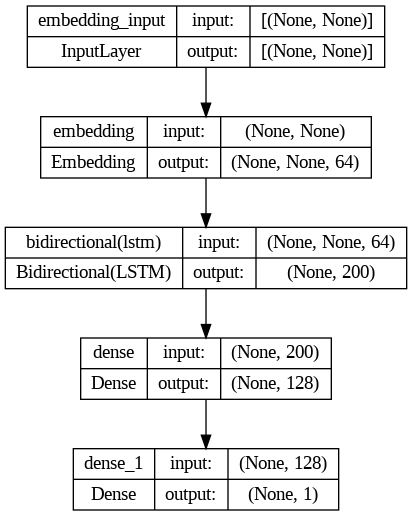

In [ ]:
# construct model
BATCH_SIZE = 64

from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile("adam","binary_crossentropy",metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [ ]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])


Epoch 1/15
173/173 [==============================] - 59s 283ms/step - loss: 0.2466 - accuracy: 0.9016 - val_loss: 0.1038 - val_accuracy: 0.9682
Epoch 2/15
173/173 [==============================] - 50s 287ms/step - loss: 0.0699 - accuracy: 0.9773 - val_loss: 0.1052 - val_accuracy: 0.9644
Epoch 3/15
173/173 [==============================] - 71s 411ms/step - loss: 0.0388 - accuracy: 0.9871 - val_loss: 0.1198 - val_accuracy: 0.9666
Epoch 4/15
173/173 [==============================] - 49s 283ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.1461 - val_accuracy: 0.9573
Epoch 5/15
173/173 [==============================] - 50s 288ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.1953 - val_accuracy: 0.9456
Epoch 6/15
173/173 [==============================] - 49s 281ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.1920 - val_accuracy: 0.9622
Epoch 6: early stopping


In [ ]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

115/115 [==============================] - 3s 28ms/step
LSTM Recurrent Neural Network baseline: 0.9999346946465894
LSTM Recurrent Neural Network: 0.9838958047677265


In [ ]:
model.evaluate(X_test_seq_padded, y_test)

115/115 [==============================] - 5s 42ms/step - loss: 0.1920 - accuracy: 0.9622


[0.19204822182655334, 0.9622077345848083]

Text(0.5, 1.0, 'Training and Validation Accuracy')

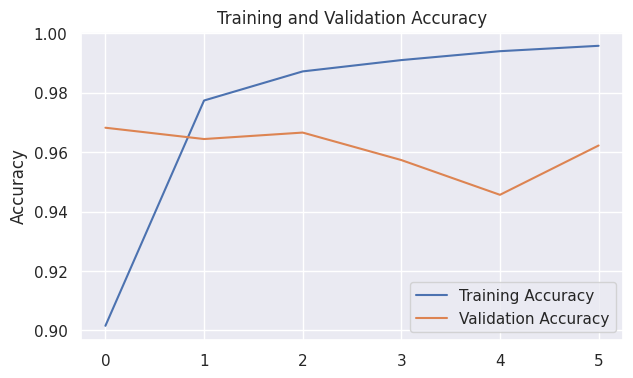

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(7,4))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")